<a href="https://colab.research.google.com/github/tubagus86/IYKRA-Fellowship/blob/master/HR%20Analytic%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Tubagus Hadi Wijaya Kusuma
# Task : Prediction of Employee Promotion

# Load Dataset

In [ ]:
pip install sidetable

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/My Drive/dataset_test_ds.xlsx')
data

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,18181,Technology,wilayah_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,89743,Operations,wilayah_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,29069,Analytics,wilayah_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,28765,Sales & Marketing,wilayah_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# Data Understanding

In [ ]:
print('shape of employee data: {}'.format(data.shape))

shape of employee data: (54808, 14)


In [ ]:
data.describe()

,id_karyawan,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,54346.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,15152.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,34820.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,54376.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,73881.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,93449.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## Handling Missing Values

In [ ]:
# Check Missing Values
print(data.isna().sum())
print("----------------------------------------------")
print(data.info())

id_karyawan                   0
departemen                    0
wilayah                       0
pendidikan                 2409
jenis_kelamin                 0
rekrutmen                     0
jumlah_training               0
umur                          0
rating_tahun_lalu          4124
masa_kerja                    0
KPI_>80%                      0
penghargaan                   0
rata_rata_skor_training       0
dipromosikan                  0
dtype: int64
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               52399 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   

In [ ]:
data.rating_tahun_lalu.isnull().groupby([data['masa_kerja']]).sum().astype(int).reset_index(name='count').head()

,masa_kerja,count
0,1,4124
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
def replace_mean_mode(df):
    category_columns=df.select_dtypes(include=['object']).columns.tolist()
    integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
    for column in df:
        if df[column].isnull().any():
            if(column in category_columns):
                df[column]=df[column].fillna(df[column].mode()[0])
            else:
                df[column]=df[column].fillna(0)
    return df

In [ ]:
replace_mean_mode(data)

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,18181,Technology,wilayah_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,89743,Operations,wilayah_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,29069,Analytics,wilayah_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,28765,Sales & Marketing,wilayah_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
#data = data.dropna()
#data.info()

In [ ]:
#data['rating_tahun_lalu'] = pd.to_numeric(data['rating_tahun_lalu'], errors='coerce')

In [ ]:
# check again the missing values

print(data.isna().sum())
print("----------------------------------------------")
print(data.info())

id_karyawan                0
departemen                 0
wilayah                    0
pendidikan                 0
jenis_kelamin              0
rekrutmen                  0
jumlah_training            0
umur                       0
rating_tahun_lalu          0
masa_kerja                 0
KPI_>80%                   0
penghargaan                0
rata_rata_skor_training    0
dipromosikan               0
dtype: int64
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               54808 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  o

## Check duplicate data

In [ ]:
data[data['id_karyawan'].isin(data['id_karyawan'][data['id_karyawan'].duplicated()])].sort_values('id_karyawan')

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan


# Data Preparation

## Data Distribution

In [ ]:
# create function to check data distribution

def distribution(column, data):
    skewness = data[column].skew()
    print('Skewness of column {} is {}'.format(column,skewness))
    sns.set(style='ticks')
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={'height_ratios': (.15, .85)})

    sns.boxplot(data[column], ax=ax_box)
    sns.distplot(data[column], ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

Skewness of column umur is 1.0074317710382241


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



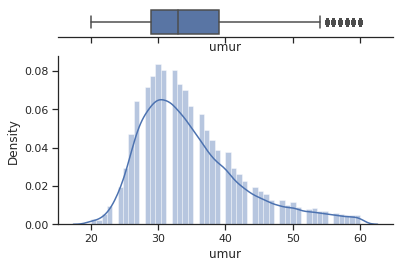

In [ ]:
distribution("umur",data)

Skewness of column masa_kerja is 1.738061458740809


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



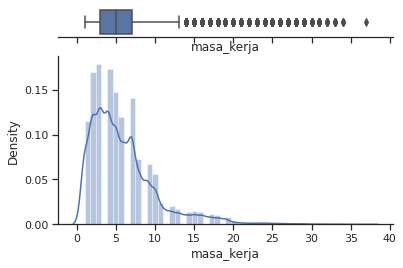

In [ ]:
distribution("masa_kerja",data)

Skewness of column rata_rata_skor_training is 0.45190808551707995


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



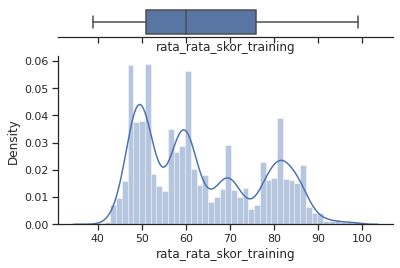

In [ ]:
distribution('rata_rata_skor_training', data)

## Exploratory Data Analysis

In [ ]:
def plot_count(df, col, colors = []):
  new_df = df.stb.freq([col])
  title="Count plot {}".format(col)

  fig = px.bar(new_df, x = col, 
             y = 'count', 
             color = colors, 
             #barmode = 'stack', 
             text= 'count',
             title=title,
             template = 'simple_white'
             )
  fig.update_layout(showlegend=False)
  fig.update_xaxes(showgrid=False)
  fig.update_yaxes(showgrid=False)
  fig.show()
  print(new_df)

In [ ]:
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22'
]
plot_count(data,'departemen', colors)

          departemen  count    percent  cumulative_count  cumulative_percent
0  Sales & Marketing  16840  30.725442             16840           30.725442
1         Operations  11348  20.705007             28188           51.430448
2         Technology   7138  13.023646             35326           64.454094
3        Procurement   7138  13.023646             42464           77.477740
4          Analytics   5352   9.764998             47816           87.242738
5            Finance   2536   4.627062             50352           91.869800
6                 HR   2418   4.411765             52770           96.281565
7              Legal   1039   1.895709             53809           98.177273
8                R&D    999   1.822727             54808          100.000000


In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plot_count(data,'pendidikan', colors)

         pendidikan  count    percent  cumulative_count  cumulative_percent
0        Bachelor's  39078  71.299810             39078           71.299810
1  Master's & above  14925  27.231426             54003           98.531236
2   Below Secondary    805   1.468764             54808          100.000000


In [ ]:
colors = ['#1f77b4', '#ff7f0e']
plot_count(data,'jenis_kelamin', colors)

  jenis_kelamin  count    percent  cumulative_count  cumulative_percent
0             m  38496  70.237921             38496           70.237921
1             f  16312  29.762079             54808          100.000000


In [ ]:
data_1 = data.copy()
data_1['dipromosikan'] = data_1['dipromosikan'].replace({0:'no', 1:'yes'})
data_1['KPI_>80%'] = data_1['KPI_>80%'].replace({0:'no', 1:'yes'})

In [ ]:
colors = ['#1f77b4', '#ff7f0e']
plot_count(data_1,'dipromosikan', colors)

  dipromosikan  count    percent  cumulative_count  cumulative_percent
0           no  50140  91.482995             50140           91.482995
1          yes   4668   8.517005             54808          100.000000


In [ ]:
#df_crosstab = pd.crosstab(data['departemen'], data['jenis_kelamin'])
#unique_df = df_crosstab.index.tolist()
#fig,ax = plt.subplots(figsize=(13,13))
#title = 'Stacked Barplot {} vs {}'.format('jenis_kelamin',
 #                                         'departemen')
#df_crosstab.plot.bar(ax = ax, title=title,stacked=True, rot=45)
#ax.grid(False)
#sns.despine(bottom = True, left = True)

#for p in ax.patches:
 #   width, height = p.get_width(), p.get_height()
  #  x, y = p.get_xy() 
   # ax.text(x+width/2, 
    #        y+height+130, 
     #       height, 
      #      horizontalalignment='center', 
       #     verticalalignment='center')

#plt.show()

In [ ]:
fig = px.box(data, 
             x="jenis_kelamin", 
             y="umur", 
             color="dipromosikan",
             notched=True,
             title="Box plot of Age and Gender",
             hover_data=["dipromosikan"]
            )
fig.show()

In [ ]:
#fig,ax = plt.subplots(figsize=(13,8))
#sns.set(style="whitegrid")
#ax = sns.boxplot(y = data["umur"],
 #                x = data['jenis_kelamin'],
  #               hue = data['dipromosikan'])

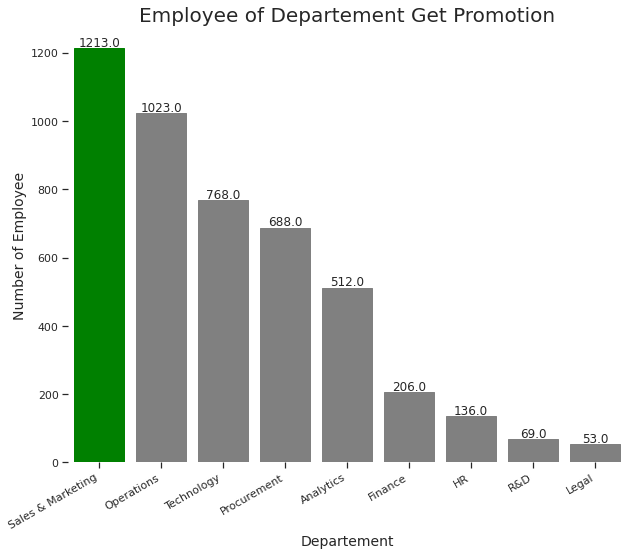

In [ ]:
data2 = data[data['dipromosikan']!=0].groupby(['departemen'])['id_karyawan'].count().reset_index(name="counts")

plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'departemen', y = 'counts', data = data2.reset_index(),
                 order = data2.sort_values('counts', ascending=False).departemen)
ax.set_title('Employee of Departement Get Promotion', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlabel('Departement', size = 14)
ax.set_ylabel('Number of Employee', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.grid(False)
sns.despine(bottom = True, left= True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height+35, 
            height, 
            horizontalalignment='center', 
            verticalalignment='top')
    
for bar in ax.patches:
  if bar.get_height() == max(data2['counts']):
    bar.set_color('green') 
  else:
    bar.set_color('grey')

plt.show()

Departemen Sales&Marketing and Operations is the most departemen that the employee get the promotion

Based on the visualization above, it can be seen that gender is not significantly different from one another towards the 'dipromosikan'

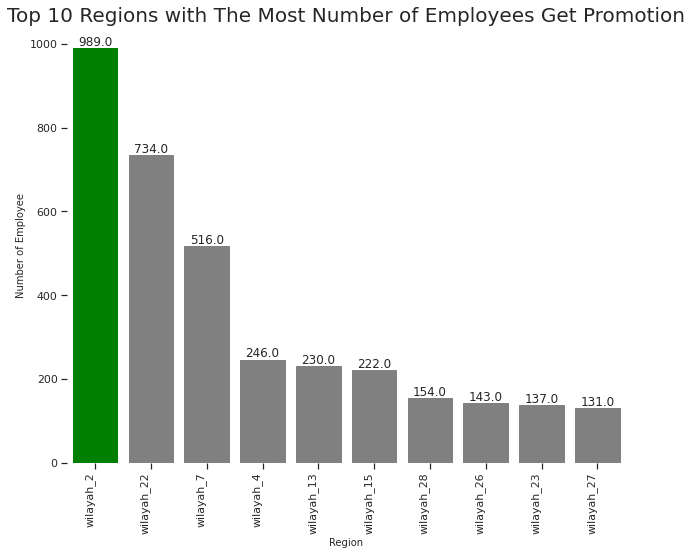

In [ ]:
data3 = data[data['dipromosikan']!=0].groupby(['wilayah'])['id_karyawan'].count().reset_index(name="count").nlargest(10,['count'])

plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'wilayah', y = 'count', data = data3.reset_index(), palette = 'magma',
                 order = data3.sort_values('count', ascending=False).wilayah)
ax.set_title('Top 10 Regions with The Most Number of Employees Get Promotion', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_xlabel('Region', size = 10)
ax.set_ylabel('Number of Employee', size = 10)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.grid(False)
sns.despine(bottom = True, left = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height+30, 
            height, 
            horizontalalignment='center', 
            verticalalignment='top')

for bar in ax.patches:
  if bar.get_height() == max(data3['count']):
    bar.set_color('green') 
  else:
    bar.set_color('grey')
plt.show()

Wilayah_2 have the highest total employee that got the promotion

In [ ]:
import plotly.graph_objects as go
data3 = data[data['dipromosikan']!=0].groupby(['rekrutmen'])['id_karyawan'].count().reset_index(name="count")
label = data3['rekrutmen'].unique()

fig = go.Figure(data=[go.Pie(labels=label, values=data3['count'], textinfo='label+percent',
                             texttemplate = "%{label}: %{value:,s} <br>(%{percent})",
                             textposition = "inside",
                             pull=[0, 0.2, 0],
                             title='Percentage Source of Recruitment which Get Promotion'
                            )])
fig.show()

## Feature Engineering

In [ ]:
age_labels = ['20-24', '25-29', '30-34', '35-39', '>39']
data_1['age_range'] = pd.qcut(data_1['umur'], q = [0, .2, .4, .6, .8, 1], labels= age_labels)
data_1.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan,age_range
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,yes,0,49,no,30-34
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,no,0,60,no,25-29
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,no,0,50,no,30-34
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,no,0,50,no,35-39
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,no,0,73,no,>39


In [ ]:
work_labels = ['short', 'middle', 'long']
data_1['work_period'] = pd.qcut(data_1['masa_kerja'], q = [0, .25, .75, 1], labels= work_labels)
data_1.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan,age_range,work_period
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,yes,0,49,no,30-34,long
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,no,0,60,no,25-29,middle
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,no,0,50,no,30-34,middle
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,no,0,50,no,35-39,long
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,no,0,73,no,>39,short


In [ ]:
data4 = data_1.groupby(['departemen', 'age_range'])['id_karyawan'].count().reset_index(name="counts")
data4.head()

,departemen,age_range,counts
0,Analytics,20-24,1454
1,Analytics,25-29,1847
2,Analytics,30-34,821
3,Analytics,35-39,725
4,Analytics,>39,505


In [ ]:
fig = px.bar(data4, x="age_range",
             y="counts",
             color="departemen",
             title="Age Range each Department",
             text = 'counts',
             facet_col = 'departemen',
             facet_col_wrap = 3,
             template = 'simple_white',
             #barmode = 'group',
             height = 1200
            # width = 1400
             )
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# masa kerja vs age_range
data5 = data_1[data_1['dipromosikan']!=0].groupby(['work_period', 'departemen', 'KPI_>80%'])['id_karyawan'].count().reset_index(name="counts")
data5.head()

,work_period,departemen,KPI_>80%,counts
0,short,Analytics,no,1195
1,short,Analytics,yes,877
2,short,Finance,no,597
3,short,Finance,yes,488
4,short,HR,no,581


In [ ]:
fig = px.bar(data5, x="work_period",
             y="counts",
             color="KPI_>80%",
             title="KPI 80% and Work Period each Department",
             text = 'counts',
             facet_col = 'departemen',
             facet_col_wrap = 3,
             template = 'simple_white',
             barmode = 'group',
             height = 1100
             #width = 1300
             )
fig.update_traces(textposition='outside')
#fig.update_layout(showlegend=False)
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

#fig = make_subplots(
 #   rows=3, cols=1,
  #  shared_xaxes=True,
   # vertical_spacing=0.03,
    #specs=[[{"type": "table"}],
     #      [{"type": "bar"}],
      #     [{"type": "bar"}]]
#)

#fig.add_trace(
 #   go.Bar(
  #      x=data2["departemen"],
   #     y=data2["counts"],
        #mode="bar"
    #    name="Departemen",
    #),
    #row=2, col=1
#)

#fig.add_trace(
 #   go.Table(
  #      header=dict(
   #         values=["departemen", "jumlah"],
    #        font=dict(size=10),
     #       align="left"
      #  ),
       # cells=dict(
        #    values=[data2.departemen, data2.counts],
         #   align = "left")
    #),
    #row=1, col=1
#)
#fig.update_layout(
 #   height=800,
  #  showlegend=False,
   # title_text="Employee each Departemen Get Promotion",
#)

#fig.show()

## Correlation Data Analysis

In [ ]:
def factorize_to_number(df,columname):
    codes, uniques = pd.factorize(df[columname])
    df[columname] = codes
    return df

In [ ]:
# Define Function to normalize data

def normalize_data(numerical_df):
    x = numerical_df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns = numerical_df.columns)
    return df

In [ ]:
# Drop id_karyawan
data_1 = data_1.drop(["id_karyawan"],axis = 1)

In [ ]:
data1 = factorize_to_number(data_1,'departemen')
data1 = factorize_to_number(data_1,'wilayah')
data1 = factorize_to_number(data_1,'pendidikan')
data1 = factorize_to_number(data_1,'jenis_kelamin')
data1 = factorize_to_number(data_1,'rekrutmen')
data1 = factorize_to_number(data_1,'age_range')
data1 = factorize_to_number(data_1,'work_period')
data1 = factorize_to_number(data_1,'KPI_>80%')
data1 = factorize_to_number(data_1,'dipromosikan')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   departemen               54808 non-null  int64  
 1   wilayah                  54808 non-null  int64  
 2   pendidikan               54808 non-null  int64  
 3   jenis_kelamin            54808 non-null  int64  
 4   rekrutmen                54808 non-null  int64  
 5   jumlah_training          54808 non-null  int64  
 6   umur                     54808 non-null  int64  
 7   rating_tahun_lalu        54808 non-null  float64
 8   masa_kerja               54808 non-null  int64  
 9   KPI_>80%                 54808 non-null  int64  
 10  penghargaan              54808 non-null  int64  
 11  rata_rata_skor_training  54808 non-null  int64  
 12  dipromosikan             54808 non-null  int64  
 13  age_range                54808 non-null  int64  
 14  work_period           

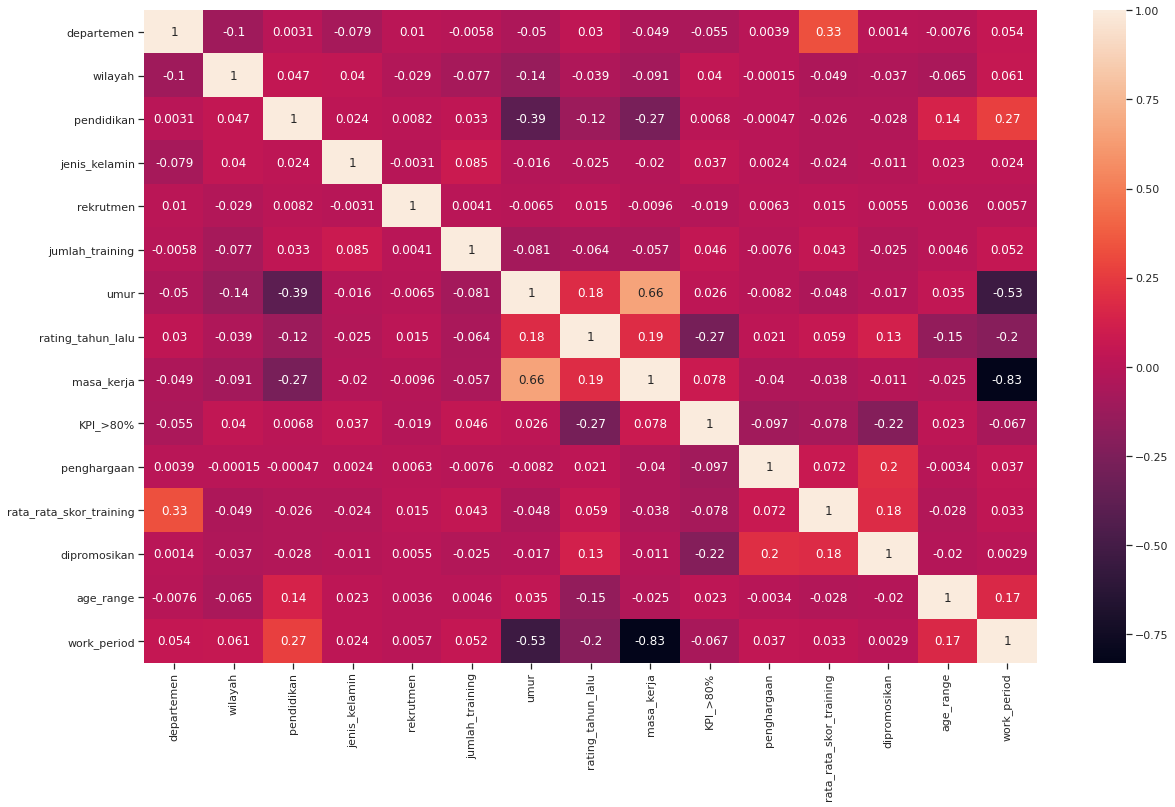

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,12))
numerical_feature = data_1.copy()
numerical_feature = normalize_data(numerical_feature)
cormat = numerical_feature.corr()
sn.heatmap(cormat, annot=True, ax =ax)
plt.show()

According to the correlation matrix above, some features e.g (rating_tahun_lalu, KPI_>80%, masa_kerja, penghargaan, and rata_rata_skor_training) have positive correlation (not significant) with the "dipromosikan" feature

# Modelling

In [ ]:
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def modeling_(df,feature_name,smote = False):
    names = ["Nearest Neighbors","Naive Bayes","Logistic Regression",
         "Decision Tree", "Random Forest", "XGBoost",
         ]

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifiers = [
        KNeighborsClassifier(3),
        GaussianNB(),
        LogisticRegression(),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        GradientBoostingClassifier(random_state=0)
        ]
    
    X = df.drop(['dipromosikan'],axis=1)
    X = X[feature_name]
    X = normalize_data(X)
    Y = data['dipromosikan'].tolist()
#     Split Training and Testing Data to 60:40
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)
    
    # Reduce the imbalanced samples in training data
    if(smote is True):
        over = SMOTE(sampling_strategy=0.3)
        under = RandomUnderSampler(sampling_strategy=0.8)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        X_train, y_train = pipeline.fit_resample(X_train, y_train)
        print(Counter(y_train))
        print('Smote Sucessfull')
        
    fig, ax = plt.subplots(figsize=(15, 8))
    for nam, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

 # menampilkan grafik ROC

        viz = plot_roc_curve(clf, X_test, y_test,
                             name='ROC '+ nam,
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

# menampilkan grafik diagonal ROC

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', 
            label='Chance', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

# menampilkan hasil perhitungan standar deviasi

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()

def modeling_2(X,Y,smote=False):
    names = ["Nearest Neighbors","Naive Bayes","Logistic Regression",
         "Decision Tree", "Random Forest", "XGBoost",
         ]

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifiers = [
        KNeighborsClassifier(3),
        GaussianNB(),
        LogisticRegression(),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        GradientBoostingClassifier(random_state=0)
        ]
    
#     Split Training and Testing Data to 60:40
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)
    
     # Reduce the imbalanced samples in training data
    if(smote is True):
        over = SMOTE(sampling_strategy=0.2)
        under = RandomUnderSampler(sampling_strategy=0.8)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        X_train, y_train = pipeline.fit_resample(X_train, y_train)
        print(Counter(y_train))
        print('Smote Sucessfull')
    
    fig, ax = plt.subplots(figsize=(15, 8))
    for nam, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        viz = plot_roc_curve(clf, X_test, y_test,
                             name='ROC '+ nam,
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
            title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## Modeling By Positive Correlation Feature + SMOTE

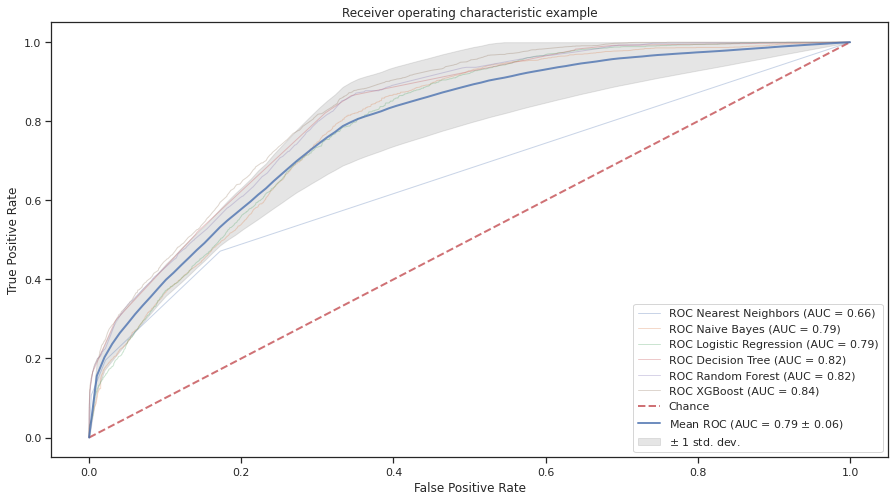

In [ ]:
modeling_(data1,['rekrutmen','rating_tahun_lalu','KPI_>80%','penghargaan','rata_rata_skor_training'],smote = False)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 11286, 1: 9029})
Smote Sucessfull


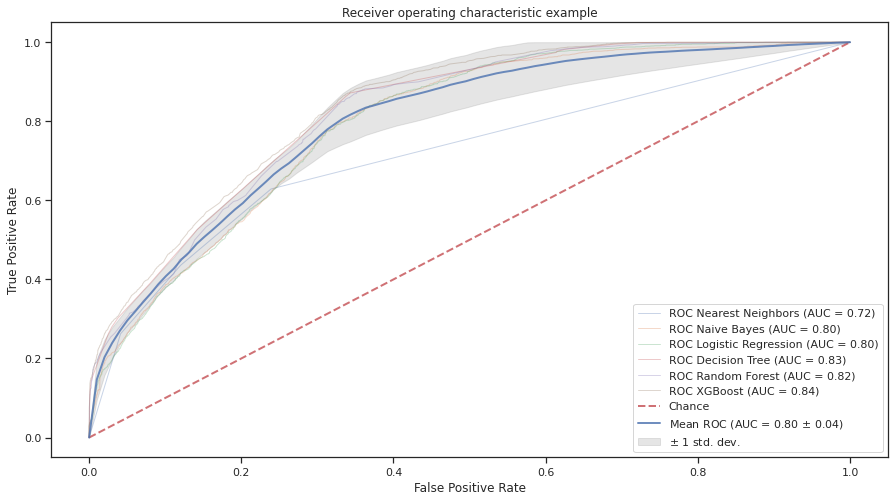

In [ ]:
modeling_(data1,['rekrutmen','rating_tahun_lalu','KPI_>80%','penghargaan','rata_rata_skor_training'],smote = True)

## Univariate Feature Selection + SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 7517, 1: 6014})
Smote Sucessfull


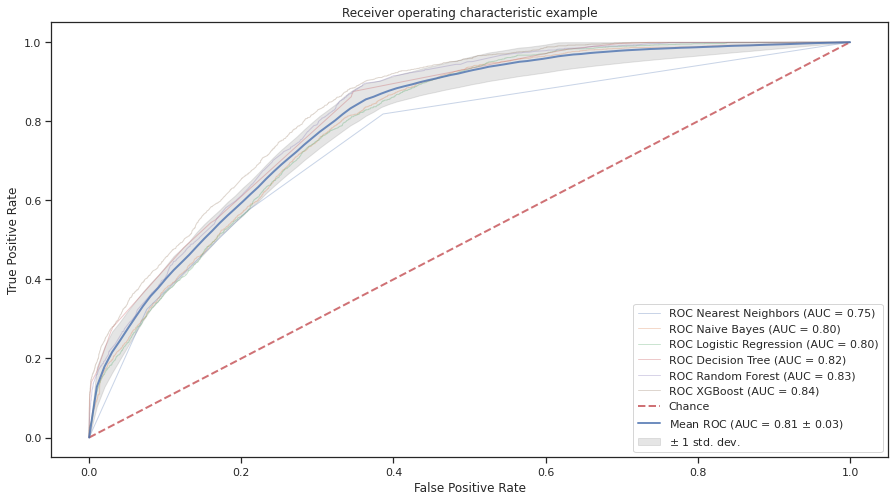

In [ ]:
import collections
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X = data1.drop(['dipromosikan'],axis=1)
X = normalize_data(X)
y = data1['dipromosikan'].tolist()

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
modeling_2(X_new,y,smote=True)

## Univariate Feature Selection and PCA + SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 7517, 1: 6014})
Smote Sucessfull


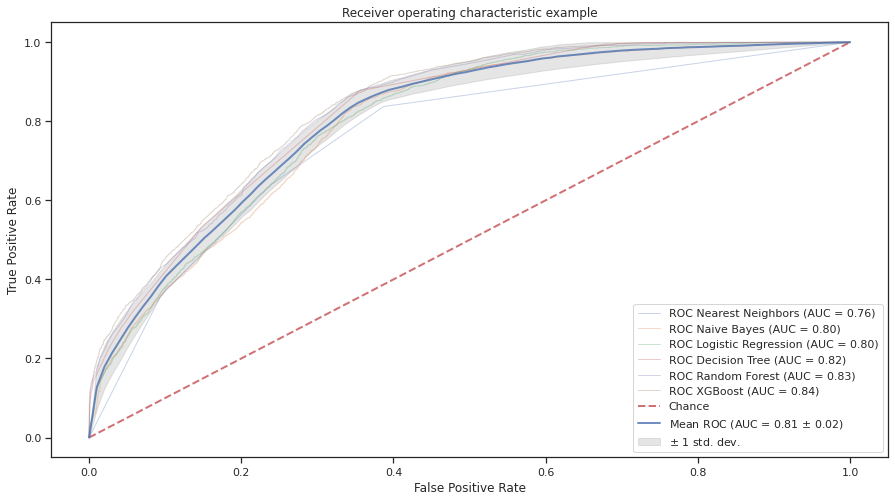

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
selection = SelectKBest(k=4)
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])
X = data1.drop(['dipromosikan'],axis=1)
X = normalize_data(X)
X_features = combined_features.fit(X, y).transform(X)
modeling_2(X_features,y,smote=True)

# Deployment

This experiment aims to evaluate the performance classifiers in order to predict the employee promotion. The experimental setup includes analyze the performance classifiers based on several feature selection method such as corelation matrix,univariate feature selection and principal component analysis (PCA). Due to the imbalanced-dataset, an over/under sampling technique is applied to the dataset using SMOTE. 

The result shows that. Logistic Regression, Random Forest, XGBoost provide competitive results of AUC followed by Naive bayes and KNN.

In order to improve the performance of the classifier:
- Adding more traning data.
- Using the KNN-Imputation to handle the missing data
- Using grid-search to perfom parameter tunning of the classifier (time consuming)